# Load the dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score

sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 100
%matplotlib inline

In [37]:
import numpy
print(numpy.__version__)


1.26.4


In [38]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# EDA

In [39]:
df.shape

(178, 14)

In [40]:
df.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [41]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.corr()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [44]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [87]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  1.84791957,
         1.01300893,  1.20832228],
       [-1.21394365,  0.24628963, -0.50172839, ...,  1.1134493 ,
         0.96524152,  1.20832228],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.78858745,
         1.39514818,  1.20832228],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.48544548,
         0.28057537,  0.03301427],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.40069891,
         0.29649784,  0.03301427],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.42894777,
        -0.59516041,  0.03301427]])

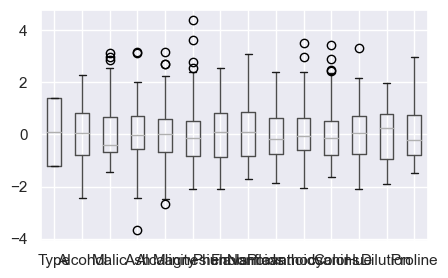

In [46]:
df=pd.DataFrame(x,columns=df.columns)
df.boxplot()
plt.show()

In [47]:
def plot_histograms():
    for col in df.columns:
        plt.figure()
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.show()


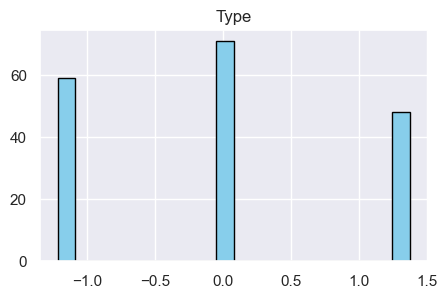

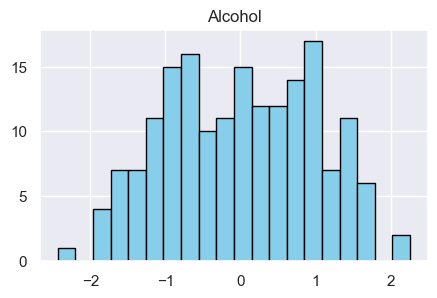

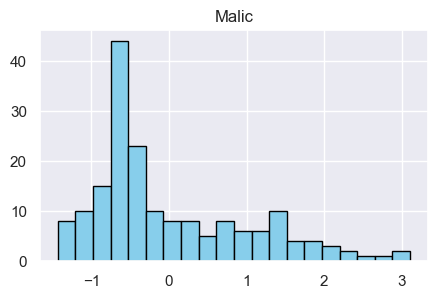

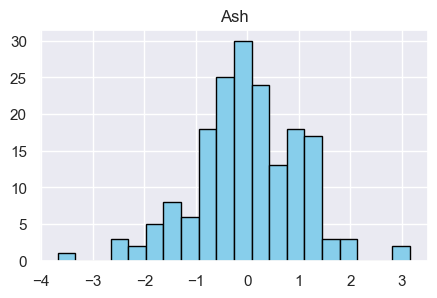

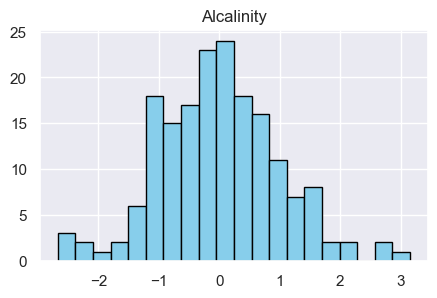

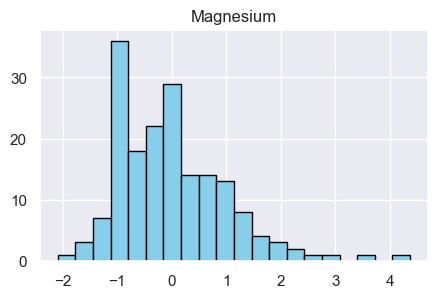

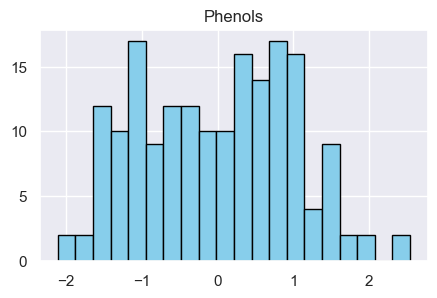

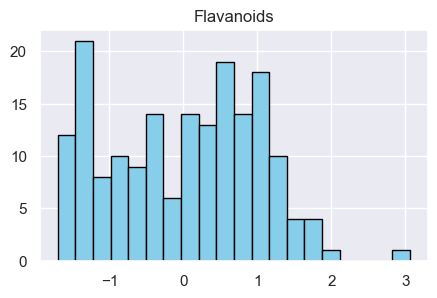

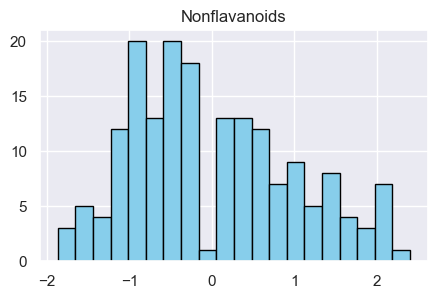

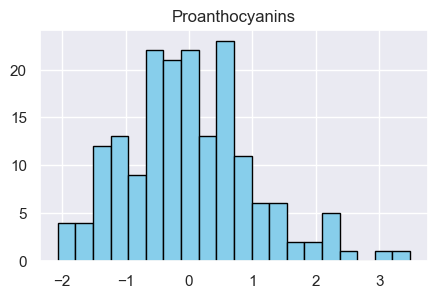

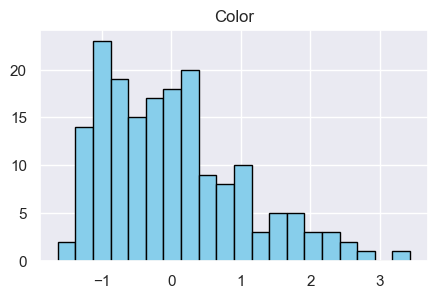

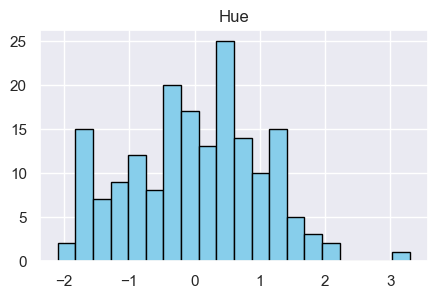

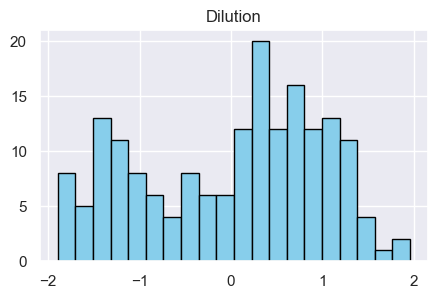

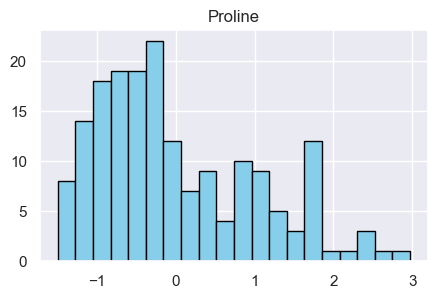

In [48]:
plot_histograms()

In [49]:
import pandas as pd

def handle_outliers_iqr(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # only numeric cols
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = df[col].clip(lower_bound, upper_bound)
    return df

# Update df directly
df = handle_outliers_iqr(df)

In [50]:
def plot_heatmap(df):
    plt.figure(figsize=(10,8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

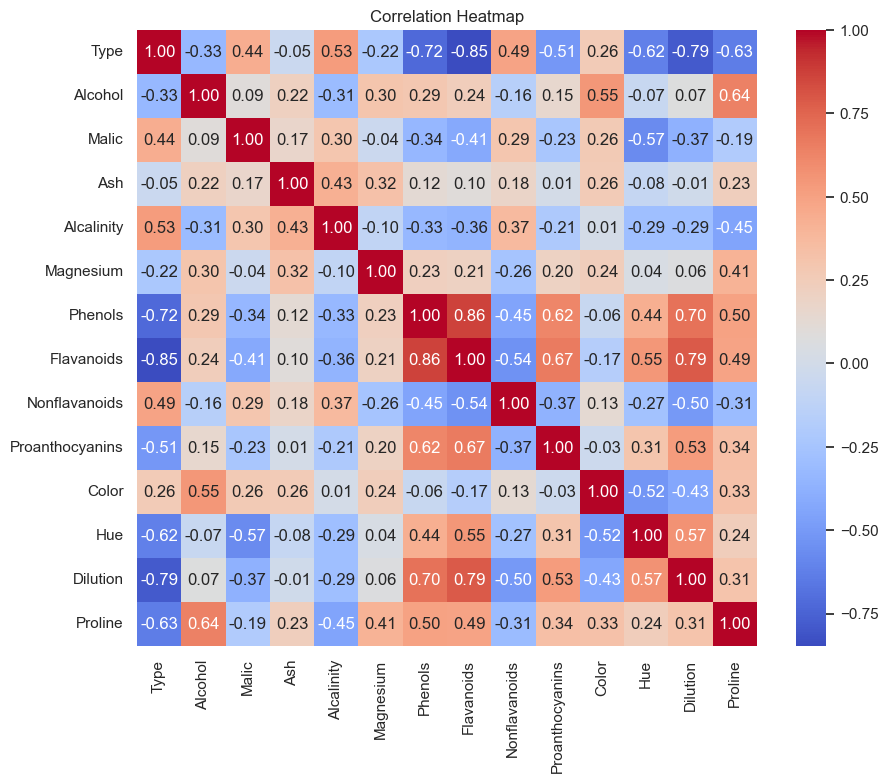

In [51]:
plot_heatmap(df)

# Clustering with orignal data

In [52]:
from sklearn.cluster import KMeans

Elbow curve

In [53]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

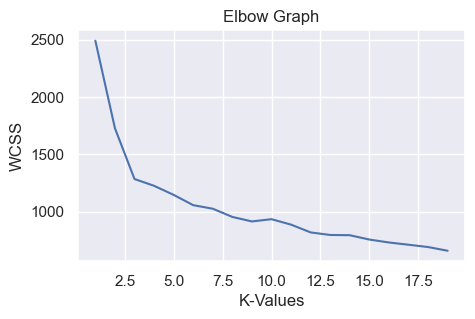

In [54]:
plt.plot(range(1,20),wcss)
#plt.axvline(x = 5, linestyle = '-.', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

We'll take 3 clusters

In [55]:
km = KMeans(3)# default 8 Cluster
yp = km.fit_predict(x)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [56]:
#cluster centre
km.cluster_centers_

array([[ 7.99603601e-02, -9.31636919e-01, -3.99196657e-01,
        -4.51550767e-01,  1.93790327e-01, -4.56580999e-01,
        -5.91314890e-02,  5.66257099e-02,  6.95919860e-04,
         3.84353723e-02, -8.64442832e-01,  4.47697639e-01,
         2.63875490e-01, -7.58852895e-01],
       [-1.17152057e+00,  8.78097281e-01, -3.04576328e-01,
         3.18941792e-01, -6.64523663e-01,  5.64888247e-01,
         8.76505462e-01,  9.43639030e-01, -5.85589813e-01,
         5.81782940e-01,  1.67188420e-01,  4.83728135e-01,
         7.67053491e-01,  1.15834713e+00],
       [ 1.32210821e+00,  1.77114789e-01,  9.06506640e-01,
         2.15969041e-01,  5.51039831e-01, -7.73451226e-02,
        -9.90100468e-01, -1.22711807e+00,  7.13487039e-01,
        -7.61278586e-01,  9.54383521e-01, -1.19006316e+00,
        -1.28939841e+00, -3.96320622e-01]])

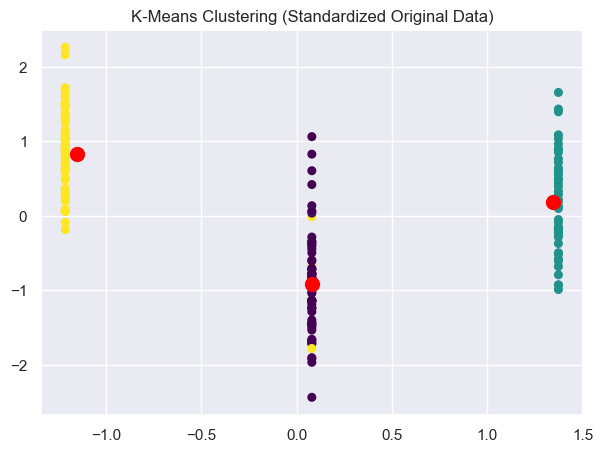

In [104]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x)

# Add cluster labels back to df
df['Cluster'] = labels  

# Plot first two features for visualization
plt.figure(figsize=(7,5))
plt.scatter(x[:,0], x[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', s=100, marker='o')
plt.title("K-Means Clustering (Standardized Original Data)")
plt.show() 

In [105]:
score = silhouette_score(x, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.34965387200390985


In [59]:
x = df.iloc[:,2:]
y = df['Type']

# Dimensionality Reduction with PCA:

In [88]:
pca = PCA()
pcs = pca.fit_transform(x)

In [89]:
pcs

array([[-3.86464838,  1.21051862, -0.09017534, ...,  0.54747797,
         0.02010503,  0.1827852 ],
       [-2.73788964, -0.20255895, -2.07346781, ...,  0.01990869,
         0.31982479,  0.16729589],
       [-3.08824809,  0.89232078,  1.03732777, ..., -0.05138505,
         0.01764147, -0.04786869],
       ...,
       [ 2.67021304,  3.1043519 , -0.90464257, ...,  0.40917885,
        -0.45336585, -0.09940163],
       [ 2.44062101,  2.62915876, -0.50575691, ...,  0.45928259,
        -0.19457099,  0.05352277],
       [ 3.15418831,  3.12758745,  1.09041485, ...,  0.19171981,
        -0.05830629, -0.30134687]])

In [90]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-3.864648,1.210519,-0.090175,0.029257,0.797951,0.200483,0.691542,-0.012485,0.385865,-1.075631,0.476249,0.473002,0.547478,0.020105,0.182785
1,-2.737890,-0.202559,-2.073468,-0.565952,-0.264618,1.007640,-0.005609,-0.980748,-0.371720,0.015885,0.105480,0.381004,0.019909,0.319825,0.167296
2,-3.088248,0.892321,1.037328,0.720424,-0.453925,-0.439808,0.450128,0.416830,-1.192633,0.328714,0.339077,0.047530,-0.051385,0.017641,-0.047869
3,-4.340441,2.263923,-0.071133,0.794732,-0.133219,-0.476073,-0.396444,-0.682924,0.213684,-0.032182,-0.539138,-0.551600,0.831806,-0.229589,-0.045417
4,-1.739509,1.075253,2.115637,-0.517384,0.228792,0.619498,0.493967,-0.391887,0.137202,-0.183729,0.513261,-0.012504,-0.558819,0.168061,-0.466650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.256370,2.623217,-0.346166,0.671170,-0.986864,0.875348,0.623257,0.169156,0.328512,0.382725,-0.077708,-0.003490,0.440401,-0.148388,0.069020
174,2.694996,2.138520,0.243937,0.483480,0.141259,-0.018093,0.133347,0.575359,0.072388,0.253972,-0.231791,-0.342569,0.136118,0.044797,-0.036922
175,2.670213,3.104352,-0.904643,0.746909,1.179633,-0.148632,0.895829,-0.020689,0.153451,0.206785,-0.563607,0.540777,0.409179,-0.453366,-0.099402
176,2.440621,2.629159,-0.505757,-0.237968,1.074615,-1.176812,0.892739,-0.379400,-0.103880,-0.477012,-0.253886,0.220469,0.459283,-0.194571,0.053523


In [91]:
pca.explained_variance_ratio_

array([0.38995099, 0.20560564, 0.09467369, 0.06241027, 0.056362  ,
       0.04553507, 0.03503486, 0.02384242, 0.02046143, 0.01787236,
       0.01537364, 0.01161215, 0.00971463, 0.00780265, 0.00374819])

In [92]:
#Cumulative explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.38995099, 0.59555663, 0.69023033, 0.7526406 , 0.8090026 ,
       0.85453766, 0.88957252, 0.91341495, 0.93387638, 0.95174873,
       0.96712238, 0.97873452, 0.98844916, 0.99625181, 1.        ])

The CUSUM frequency for the original dataset shows that the first two components already cover around 0.59 (≈60%) of the variance. This indicates that a large portion of the dataset’s variability is explained early, and additional components only refine the explanation toward 1.0.

# Scree Plot

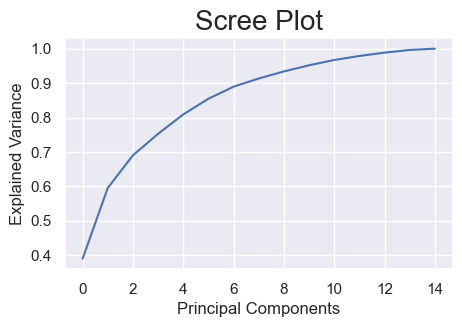

In [93]:
# plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)
plt.show()

In [94]:
pca = PCA(n_components=2)#PCA Constant Grapg-Varience=0
pcs = pca.fit_transform(x)
pcs

array([[-3.86464838,  1.21051862],
       [-2.73788964, -0.20255895],
       [-3.08824809,  0.89232078],
       [-4.3404407 ,  2.26392333],
       [-1.73950926,  1.07525336],
       [-3.68534878,  1.84264346],
       [-3.08014247,  1.07748688],
       [-2.77305794,  1.61942187],
       [-3.10128864,  0.81146799],
       [-3.27874071,  0.65274472],
       [-3.9837073 ,  1.00208824],
       [-2.40535979,  0.69775302],
       [-2.72401542,  0.66937432],
       [-3.98119722,  0.81162785],
       [-4.80976178,  1.55633915],
       [-2.98208742,  1.59720319],
       [-2.90996355,  2.19021777],
       [-2.60226694,  1.59930338],
       [-4.15268382,  2.11482191],
       [-2.72085142,  1.08370874],
       [-3.61987034,  0.63975739],
       [-1.75119037,  0.47538468],
       [-3.03612566, -0.06613468],
       [-2.19630827, -0.29747541],
       [-2.31165094, -0.15547041],
       [-1.71864576,  1.00495851],
       [-2.42344524,  0.75303322],
       [-1.87300557,  0.14923573],
       [-2.79006314,

In [95]:
data = pd.DataFrame(pcs,columns=['PC1','PC2'])
data

,PC1,PC2
0,-3.864648,1.210519
1,-2.737890,-0.202559
2,-3.088248,0.892321
3,-4.340441,2.263923
4,-1.739509,1.075253
...,...,...
173,3.256370,2.623217
174,2.694996,2.138520
175,2.670213,3.104352
176,2.440621,2.629159


In [96]:
data['Type'] = y

In [97]:
data

,PC1,PC2,Type
0,-3.864648,1.210519,-1.213944
1,-2.737890,-0.202559,-1.213944
2,-3.088248,0.892321,-1.213944
3,-4.340441,2.263923,-1.213944
4,-1.739509,1.075253,-1.213944
...,...,...,...
173,3.256370,2.623217,1.373864
174,2.694996,2.138520,1.373864
175,2.670213,3.104352,1.373864
176,2.440621,2.629159,1.373864


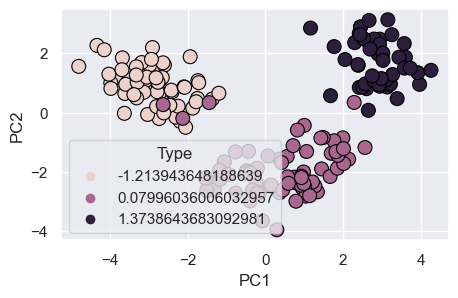

In [98]:
sns.scatterplot(x = data['PC1'], y = data['PC2'],s = 100, edgecolor = 'black',hue=data['Type'])
plt.show()

# Clustering with PCA data

In [99]:
sc = StandardScaler()

x_data = sc.fit_transform(data)
x_data

array([[-1.59793585,  0.68930009, -1.21394365],
       [-1.13204917, -0.11534222, -1.21394365],
       [-1.27691367,  0.50811015, -1.21394365],
       [-1.79466412,  1.28913552, -1.21394365],
       [-0.71924376,  0.61227661, -1.21394365],
       [-1.52379993,  1.04924805, -1.21394365],
       [-1.27356219,  0.61354843, -1.21394365],
       [-1.14659039,  0.92213999, -1.21394365],
       [-1.28230561,  0.46207051, -1.21394365],
       [-1.35567762,  0.37168944, -1.21394365],
       [-1.64716375,  0.57061453, -1.21394365],
       [-0.99455636,  0.39731832, -1.21394365],
       [-1.12631253,  0.38115876, -1.21394365],
       [-1.64612589,  0.46216154, -1.21394365],
       [-1.9887167 ,  0.88621909, -1.21394365],
       [-1.23301887,  0.90948812, -1.21394365],
       [-1.20319745,  1.2471657 , -1.21394365],
       [-1.07597256,  0.91068402, -1.21394365],
       [-1.71703133,  1.20423338, -1.21394365],
       [-1.12500429,  0.61709131, -1.21394365],
       [-1.49672623,  0.36429413, -1.213

Elbow Curve

In [79]:
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x_data)
    wcss.append(km.inertia_)

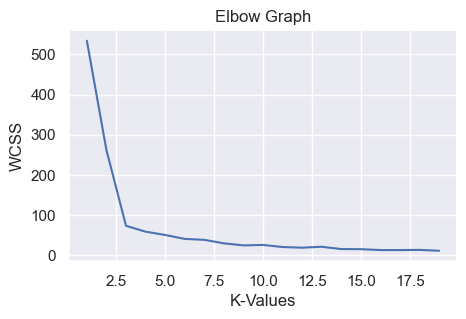

In [80]:
plt.plot(range(1,20),wcss)
#plt.axvline(x = 5, linestyle = '-.', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

In [81]:
from sklearn.cluster import KMeans

In [100]:
km = KMeans(3)# default 8 Cluster
yp = km.fit_predict(x_data)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [101]:
#cluster centre
km.cluster_centers_

array([[-1.17863704,  0.50286339, -1.15133539],
       [ 1.17801735,  0.94542477,  1.34745816],
       [ 0.22914398, -1.15676633,  0.07996036]])

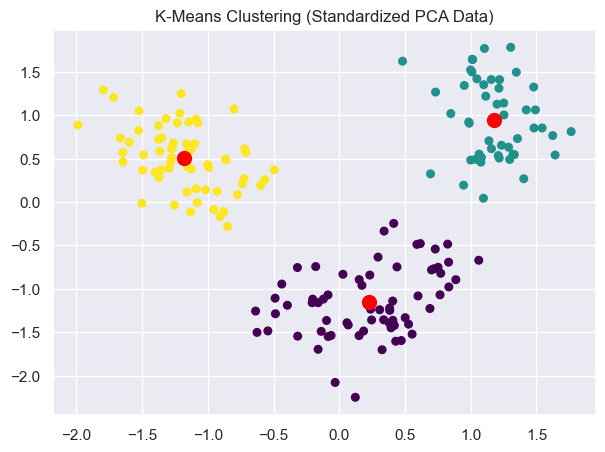

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(x_data)

# Add cluster labels back to df
df['Cluster'] = labels  

# Plot first two features for visualization
plt.figure(figsize=(7,5))
plt.scatter(x_data[:,0], x_data[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', s=100, marker='o')
plt.title("K-Means Clustering (Standardized PCA Data)")
plt.show() 

In [103]:
score = silhouette_score(x_data, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.7178519304570345


# Comparision and analysis (Original vs PCA-transformed data)

On the original dataset, the silhouette score is 0.3496, which shows weak separation between clusters.

On the PCA-transformed dataset, the silhouette score increases significantly to 0.7179, indicating strong and well-separated clusters.

2. Similarities and differences

Similarities:

Both approaches use k = 3 clusters.

The basic grouping structure is consistent.

Differences:

PCA-based clustering shows compact, well-defined clusters.

Original data clustering shows overlapping clusters with poor boundaries.

3. Impact of dimensionality reduction

PCA extracts the maximum variance in just two dimensions, which helps in clear visualization and stronger cluster separation.

It reduces noise and correlations in the dataset, which improves K-Means performance.

A small amount of variance is lost, but clustering quality improves greatly.

4. Trade-offs: PCA vs Original Data

PCA advantages:

Boosts silhouette score from 0.3496 → 0.7179.

Provides clear 2D cluster visualization.

Reduces redundancy and noise.

# Conclusion and Insights

1. Key findings

PCA dramatically improves clustering performance. The silhouette score rises from 0.3496 (original data) to 0.7179 (PCA data).

Clusters in PCA space are compact and well-separated, while clusters on the original dataset are scattered and overlapping.

K-Means benefits strongly from dimensionality reduction.

2. Practical implications

PCA + clustering is effective when the dataset is high-dimensional and correlated, as it improves both cluster quality and visualization.

Original data clustering is useful only when interpretability of clusters in terms of raw features is required, even though performance is weaker.